## Iris鸢尾花分类
采用产生式分类器对鸢尾花进行分类

In [1]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 模型性能的评价,本案例为分类问题，用正确率作为模型性能评价指标
from sklearn.metrics import accuracy_score 

#作图
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
#读取数据
# csv文件没有列名，增加列名
feat_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

dpath = "./data/"
df = pd.read_csv(dpath + "iris.csv", names = feat_names)

#通过观察前5行，了解数据每列（特征）的概况
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


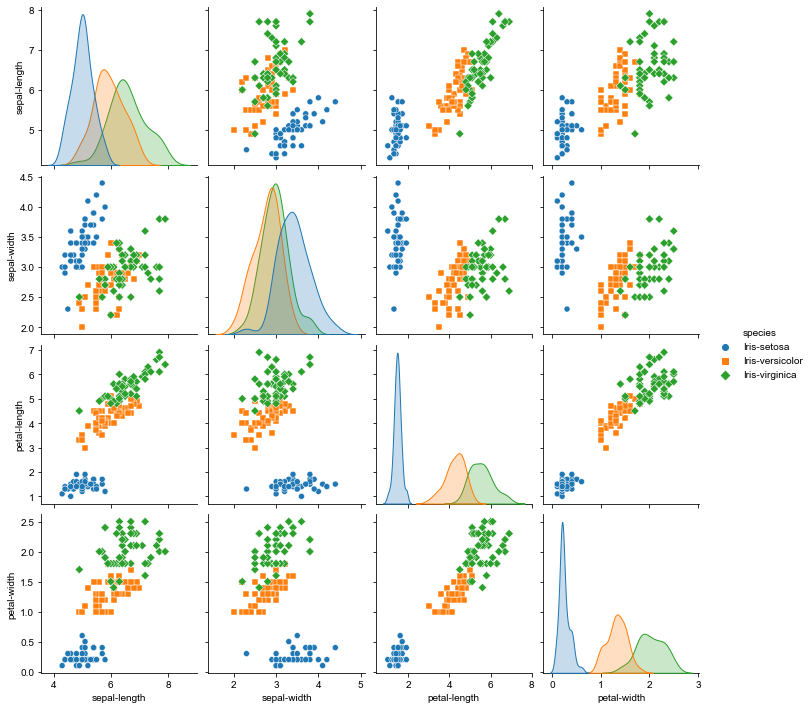

In [3]:
# 通过hue设定种类，markers不同种类的点的表示方式
# 对角线为核密度图
sns.pairplot(df, kind="scatter", diag_kind = "kde", hue="species", markers=["o", "s", "D"], diag_kws=dict(shade=True))

在给定类别的情况下，各特征并不严格独立，如sepal-length和petal-length相关性较强，但后面我们看到朴素贝叶斯模型还是取得了很好的性能
在给定类别的情况下，每两个特征看起来还比较符合高斯分布。但4维特征放在一起就不知道了

In [4]:
#标签字符串映射为整数（在此并不一定需要）
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }  #2

# Use the pandas apply method to numerically encode our attrition target variable
df['species'] = df['species'].apply(lambda x: target_map[x])

In [5]:
# 从原始数据中分离输入特征x和输出y
y = df['species']
X = df.drop('species', axis = 1)

In [6]:
#无需特征缩放
#将数据分割训练数据与测试数据
#分类数据，跳用分层采样
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试集，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify=y ) 

### 朴素贝叶斯
假设给定类别的情况下，各特征独立，且均为高斯分布

In [7]:
clf = GaussianNB()

clf.fit(X_train, y_train)

#测试集上测试 
y_test_pred = clf.predict(X_test) 
acc_test = accuracy_score(y_test, y_test_pred)

#训练集上预测 
y_train_pred = clf.predict(X_train) 
acc_train = accuracy_score(y_train, y_train_pred)

print('train acc of GaussianNB: %f', acc_train) 
print('test acc: of GaussianNB %f', acc_test)

train acc of GaussianNB: %f 0.95
test acc: of GaussianNB %f 1.0


In [8]:
print('类先验：')
print(clf.class_prior_ )                   

print('均值：')
print(clf.theta_)                           #各类在各个特征上的均值

print('标准差：')
print(clf.sigma_)                           #各类在各个特征上的标准差

类先验：
[0.33333333 0.33333333 0.33333333]
均值：
[[5.015  3.44   1.4525 0.2425]
 [5.9775 2.805  4.27   1.32  ]
 [6.5875 2.9625 5.5425 2.005 ]]
标准差：
[[0.136775   0.1509     0.03199375 0.01094375]
 [0.26524375 0.089475   0.2176     0.0401    ]
 [0.41859375 0.11384375 0.28644375 0.076475  ]]


### QDA
假设给定类别的情况下，所有特征的联合分布为多元高斯分布

In [9]:
clf = QuadraticDiscriminantAnalysis(store_covariance = True)

clf.fit(X_train, y_train)

#测试集上测试 
y_test_pred = clf.predict(X_test) 
acc_test = accuracy_score(y_test, y_test_pred)

#训练集上预测 
y_train_pred = clf.predict(X_train) 
acc_train = accuracy_score(y_train, y_train_pred)

print('train acc of QDA: %f', acc_train) 
print('test acc of QDA: %f', acc_test)

train acc of QDA: %f 0.975
test acc of QDA: %f 0.9333333333333333


#### 模型参数

In [10]:
print('类先验：')
print(clf.priors_ )                   

print('均值：')
print(clf.means_)                           

print('协方差矩阵：')
print(clf.covariance_)

print('主轴方向：')
print(clf.rotations_)

print("主轴方向的方差:")
print(clf.scalings_)

类先验：
[0.33333333 0.33333333 0.33333333]
均值：
[[5.015  3.44   1.4525 0.2425]
 [5.9775 2.805  4.27   1.32  ]
 [6.5875 2.9625 5.5425 2.005 ]]
协方差矩阵：
[array([[0.14028205, 0.10861538, 0.01662821, 0.00985897],
       [0.10861538, 0.15476923, 0.0114359 , 0.01082051],
       [0.01662821, 0.0114359 , 0.0328141 , 0.00514744],
       [0.00985897, 0.01082051, 0.00514744, 0.01122436]]), array([[0.27204487, 0.08703846, 0.17674359, 0.05738462],
       [0.08703846, 0.09176923, 0.08964103, 0.04707692],
       [0.17674359, 0.08964103, 0.22317949, 0.07805128],
       [0.05738462, 0.04707692, 0.07805128, 0.04112821]]), array([[0.42932692, 0.1161859 , 0.30900641, 0.06467949],
       [0.1161859 , 0.11676282, 0.08830128, 0.05070513],
       [0.30900641, 0.08830128, 0.29378846, 0.05439744],
       [0.06467949, 0.05070513, 0.05439744, 0.0784359 ]])]
主轴方向：
[array([[ 0.68048723,  0.63142729, -0.3717755 ,  0.00443679],
       [ 0.72492558, -0.64806439,  0.22686074,  0.05504228],
       [ 0.08804914,  0.42318148,  

### 带缩放的QDA

In [11]:
clf = QuadraticDiscriminantAnalysis(reg_param = 0.1, store_covariance = True)

clf.fit(X_train, y_train)

#测试集上测试 
y_test_pred = clf.predict(X_test) 
acc_test = accuracy_score(y_test, y_test_pred)

#训练集上预测 
y_train_pred = clf.predict(X_train) 
acc_train = accuracy_score(y_train, y_train_pred)

print('train acc of QDA2: %f', acc_train) 
print('test acc of QDA2: %f', acc_test)

train acc of QDA2: %f 0.9833333333333333
test acc of QDA2: %f 0.9666666666666667
